<a href="https://colab.research.google.com/github/deoa17/Ejercicios-de-clasificacion-Naive-Bayes/blob/master/Probando_varios_modelos_(Dataset%20multicategorial%201-5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vectorización de texto como una generalización de los feature_sets
---
En el reto anterior vimos que la noción de modelos de máxima entropía implica la consideración de varios features que quedaban codificados en funciones que  escribiamos como $f_a(t, o)$. Donde para el caso particular de un modelo de máxima entropia considerabamos el cálculo de las probabilidades como combinaciones lineales entre los features y sus respectivos pesos $\theta_i$, de manera que: 

$$
\theta_1 f_1(t, o) + \theta_2 f_2(t, o) + \dots
$$

Si en general consideramos $n$ features o atributos por cada documento de texto, tenemos un conjunto de parámetros que se pueden escribir como componentes de un vector $[\theta_1,  \dots, \theta_n]$ y lo mismo para los features así: $[f_1,  \dots, f_n]$, como sabemos que estos features toman valores entre cero y uno tenemos que un vector de features podría verse algo como: 

$$
[1, 1, 0, \dots, 0, 0, 1]
$$

de manera que la combinacion lineal de features y parámetros se puede escribir como el producto de vectores: 

$$
\theta_1 f_1(t, o) + \theta_2 f_2(t, o) + \dots = [\theta_1,  \dots, \theta_n] \cdot [f_1,  \dots, f_n] 
$$

Y es así como decimos que hemos vectorizado un texto en términos de sus features. Esta noción general de representación de texto resultará más cómoda para el reto que resolveremos en este notebook. 

## Trabajando con un dataset pre-procesado (modelo multicategoria 1-5)

Aquí trabajaremos con el dataset: **processed_stars**  de  http://www.cs.jhu.edu/~mdredze/datasets/sentiment/, el cual ya tiene pre-procesados los atributos de los textos junto con la etiqueta de sentimiento de cada uno, que ahora en este caso toma valores en una escala numérica de 1 a 5. 

---

In [86]:
# Abrimos el los archivos y los guardamos
f = open('/content/drive/My Drive/Colab Notebooks/NLP_resources/Algoritmos NLP/all_balanced.review', 'r')
text = f.read()
f.close()
text
text.split('\n')[0]

'helpful:1 voices_of:1 the_levels:1 it:1 only_knew:1 "if_i:1 guidance_in:1 departing_one:1 familiarize:1 meaning:1 self_is:1 can_be:1 knowledge:3 koan\'s_since:1 be:1 experiences_actions:1 spiritually_the:1 you_to:1 collection:1 with_not:1 as:1 disciplines_spiritually:1 levels:1 that_i:1 work_but:1 to_anything:1 each_statement:1 much_much:1 dhu-l-nun:1 a_quote:1 badruddin:1 all_through:1 sets:1 but:1 chapters_offer:1 actions_remembrances:1 one_from:1 revisited_for:1 sufisim:1 some:1 fallow:1 upon:1 which:1 bistami_and:1 more_a:1 not_only:1 bayazid:1 path_of:1 awakening:1 the_many:1 intellective_sufis:1 experiences:1 and_all:1 great:3 and_much:1 yourself:1 through_the:1 guidance\'s._the:1 in_a:1 upon_awakening:1 meaning_for:1 introducing_hadiths:1 fantasic:1 guidance\'s.:1 had_taken:1 point_it:1 contemplation_in:1 value:1 quote_from:1 sincerity:1 remembrances_and:1 of_guidance:1 compared:1 find_no:1 eternal_intellective:1 to_the:1 touch:1 be_compared:1 actions:1 compared_some:1 is_true:

---
Ahora en este caso, cada línea del dataset es un string tipo diccionario con el feature y el numero de veces que aparece en el texto, al final la categoria aparece como `#label#:` y el valor numérico, seguún el caso:

```
feature1: 1 feature2: 2, ... #label#: 2.0

```

Aquí consideraremos el mismo tipo de vectorización usado en el caso anterior con el dataset **processed_stars**

---

In [111]:
import nltk
from nltk.corpus import stopwords
bag_of_words = [] #Creamos el directorio de palabras
for line in text.split('\n'):
  seq = line.split('#label#:')
  if len(seq)==2:
    for key_value in seq[0].split(' '):
      bag_of_words.append(key_value.split(':')[0]) 
stopwords = stopwords.words('english')
bag_of_words = [w for w in bag_of_words if w.lower() not in stopwords] # Quitamos las stopwords
fdist = nltk.FreqDist(bag_of_words) # Sacamos las frecuencias
reduced_bow = [w for w in set(bag_of_words) if fdist[w]>50] # Separamos frecuencias que tengan mas de 50 repeticiones 
bigram_text = nltk.Text(bag_of_words) # Sacamos los biogramas
bigrams = list(nltk.bigrams(bigram_text))
top_bigrams = (nltk.FreqDist(bigrams)).most_common(250) # Separamos bigramas mas comunes


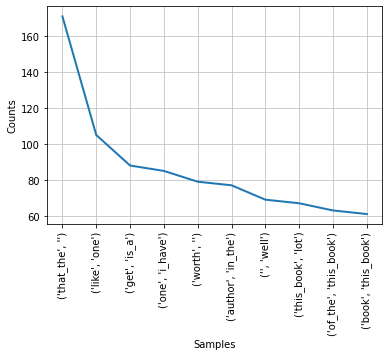

In [89]:
nltk.FreqDist(bigrams).plot(10)

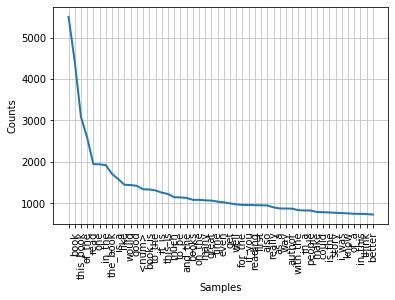

In [90]:
fdist.plot(50)

In [112]:
# Vectorizamos el texto

import numpy as np

vectors = []
labels = []
for line in text.split('\n'):
  seq = line.split('#label#:')
  if len(seq)==2:
    line_dict = {keyval.split(':')[0]: int(keyval.split(':')[1]) for keyval in seq[0].split(' ') if len(keyval.split(':'))==2}
    line_vector = []
    for word in reduced_bow:
      if word in line_dict.keys():
        line_vector.append(line_dict[word])
      else:
        line_vector.append(0)
    vectors.append(line_vector) # Indicamos si el texto tiene palabras de las mas frecuentes
    labels.append(float(seq[1]))

    bigram_text = nltk.Text(line_dict.keys())
    bigrams = list(nltk.bigrams(bigram_text))
    for word in top_bigrams:
      if word in bigrams:
        line_vector.append(1)
      else:
        line_vector.append(0)
    vectors.append(line_vector) # Indicamos si el texto tiene biogramas mas comunes
    labels.append(float(seq[1]))


vectors = np.array(vectors)

In [104]:
print(len(vectors))
print(len(labels))

11002
11002


In [109]:
from sklearn.model_selection import train_test_split

train_vectors, test_vectors, train_labels, test_labels = train_test_split(vectors, labels, test_size=0.1, random_state=42)
print('longitud dataset de entrenamiento: {}'.format(len(train_vectors)))
print('longitud dataset de evaluación: {}'.format(len(test_vectors)))

from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(train_vectors, train_labels)
clf.score(test_vectors, test_labels)

longitud dataset de entrenamiento: 9901
longitud dataset de evaluación: 1101


0.6566757493188011

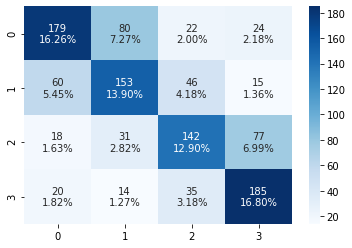

In [101]:
cm = confusion_matrix(test_labels, clf.predict(test_vectors))

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

annot = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts,group_percentages)]
annot = np.asarray(annot).reshape(4,4)
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues')

---
Como caso curioso, en la siguiente celda consideramos el entrenamiento de otros modelos de clasificación implementados en scikit. Con los conocimientos que ahora tienes, puedes explorar con total libertad el zoologico de modelos de clasificación que existen !! 

---

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB

clf = RandomForestClassifier().fit(train_vectors, train_labels)
print('Score for RandomForestClassifier = {}'.format(clf.score(test_vectors, test_labels)))

clf = BernoulliNB().fit(train_vectors, train_labels)
print('Score for Naive Bayes Bernoulli = {}'.format(clf.score(test_vectors, test_labels)))

clf = ComplementNB().fit(train_vectors, train_labels)
print('Score for Naive Bayes Complement = {}'.format(clf.score(test_vectors, test_labels)))

Score for RandomForestClassifier = 0.9527702089009991
Score for Naive Bayes Bernoulli = 0.5794732061762035
Score for Naive Bayes Complement = 0.662125340599455
